<a href="https://colab.research.google.com/github/Collins-nnaji/Data_Science/blob/main/Project_3_TelcoCustomerChurn_LogisticRegression_GradientBoosting_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv(path)

In [ ]:
# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display the summary statistics of the numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Display the information of the dataset (column names, data types, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

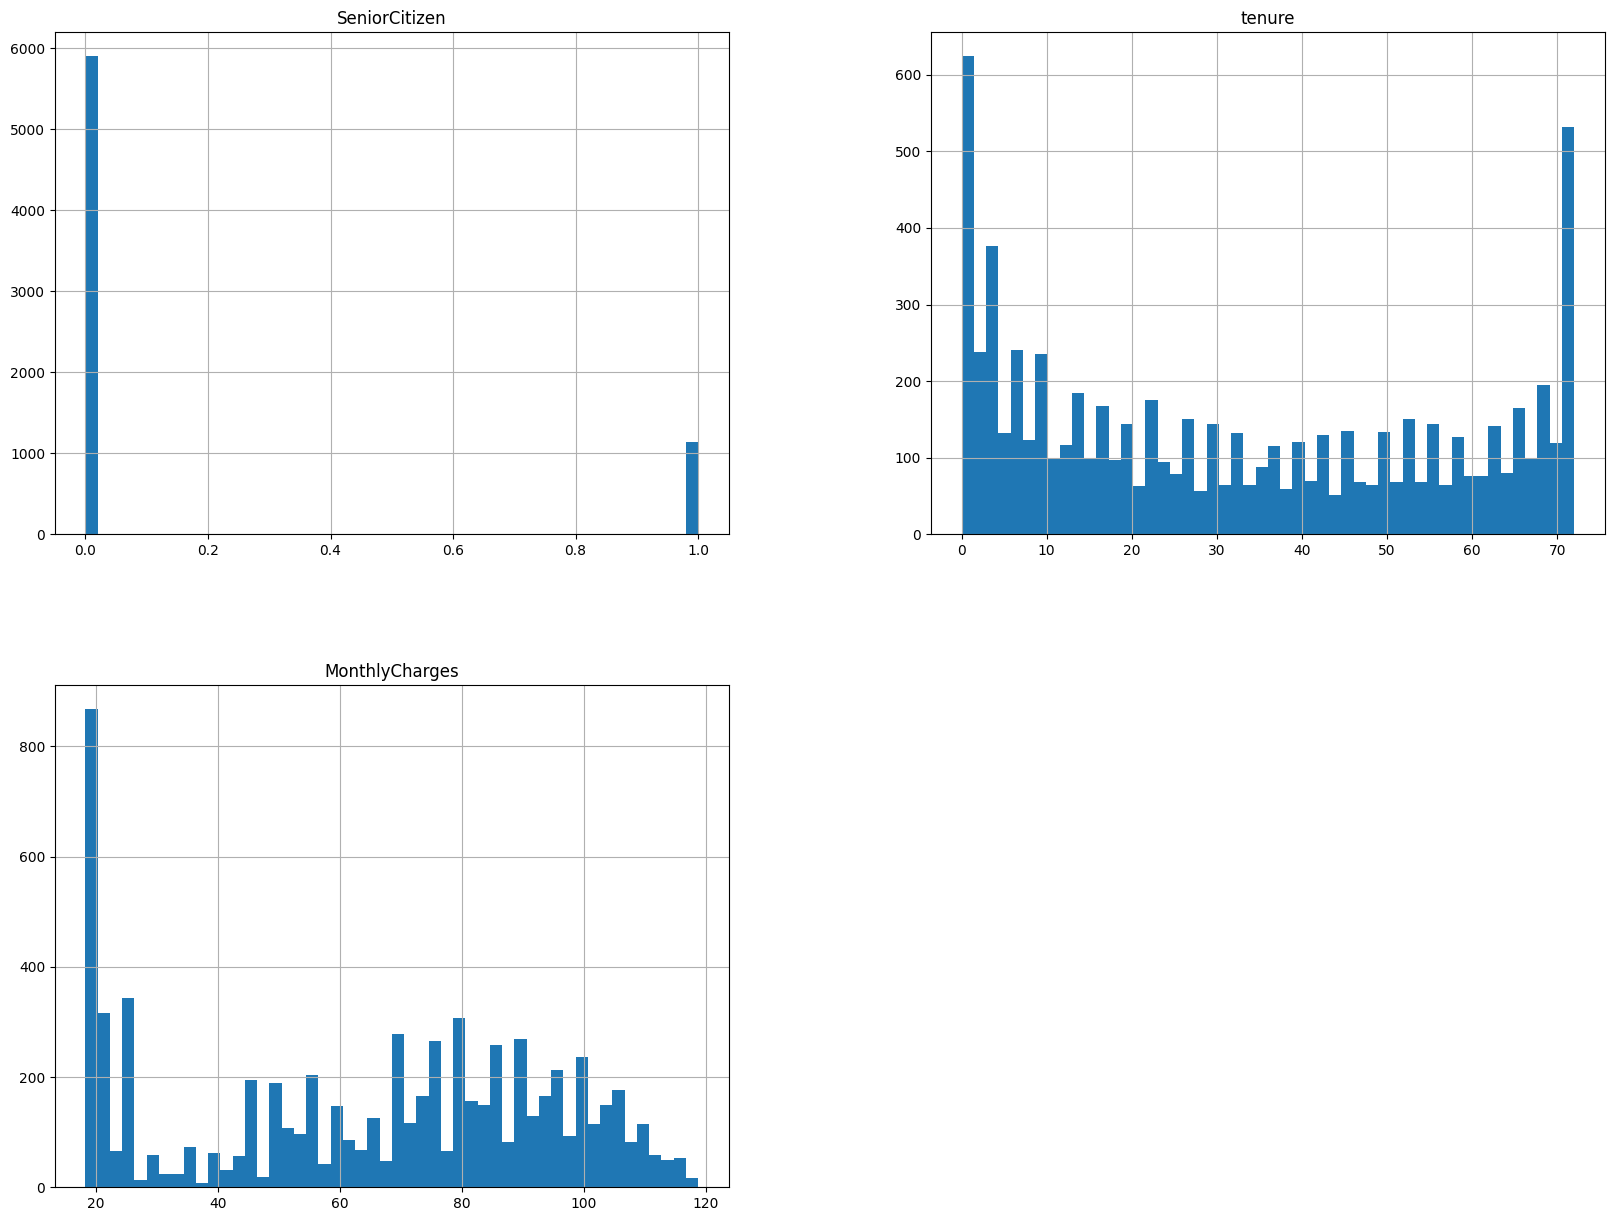

In [ ]:
# Plot histogram for each numerical attribute
df.hist(bins=50, figsize=(20,15))
plt.show()

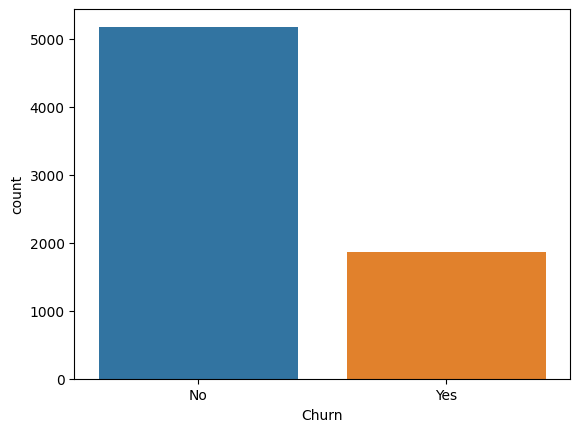

In [ ]:
# For categorical variables, we can use bar plots
sns.countplot(x='Churn', data=df)
plt.show()

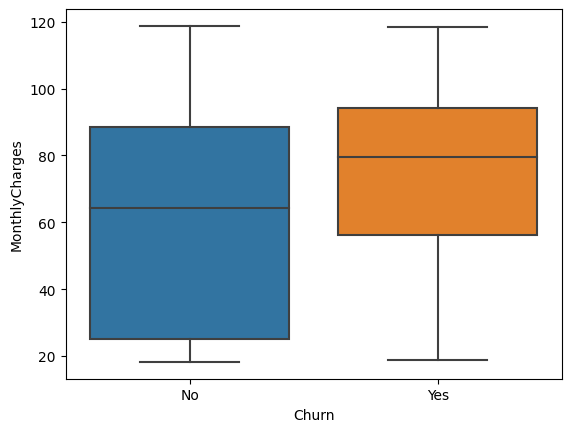

In [ ]:
# We can also use box plots to understand the distribution of the data
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)  # replace 'MonthlyCharges' with your column
plt.show()

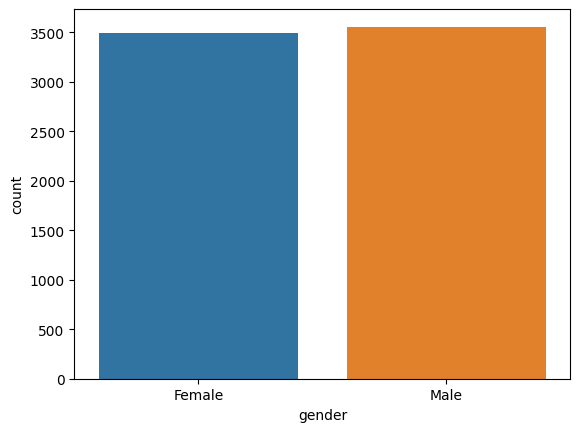

In [ ]:
sns.countplot(x='gender', data=df)
plt.show()

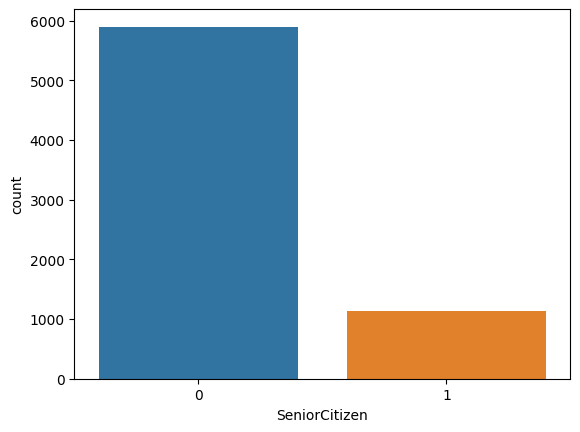

In [ ]:
sns.countplot(x='SeniorCitizen', data=df)
plt.show()

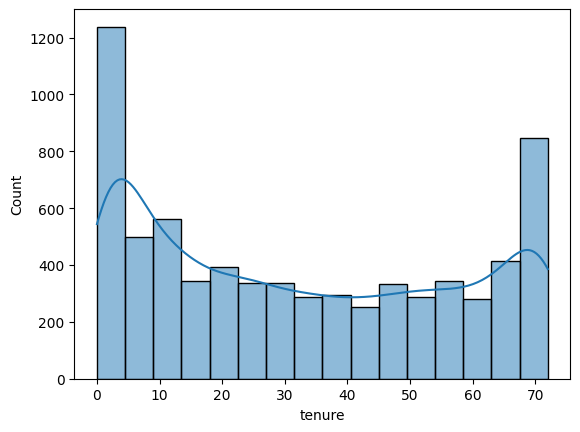

In [ ]:
#Customer tenures
sns.histplot(df['tenure'], kde=True)
plt.show()

<ipython-input-14-94d217a64af2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


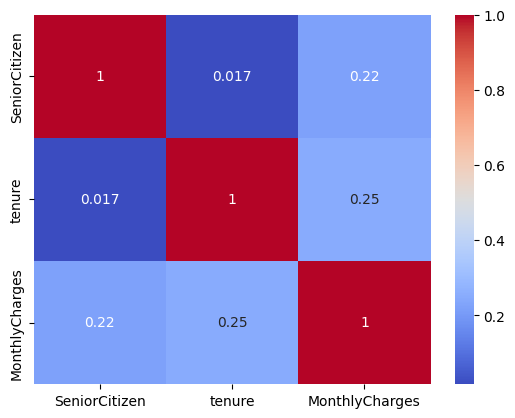

In [ ]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Check the count of each category in 'Customer Status' column
print(df['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


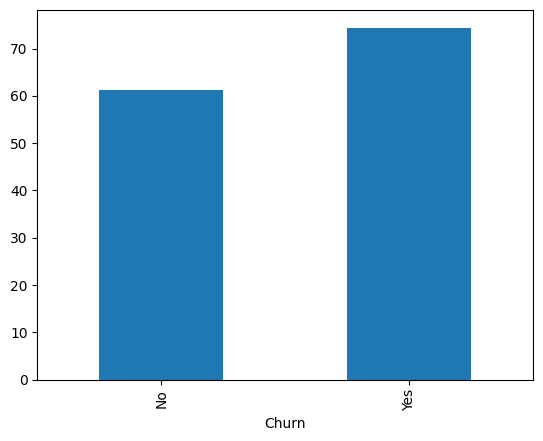

In [ ]:
#Average monthly charges for churned and not churned customers
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar')
plt.show()

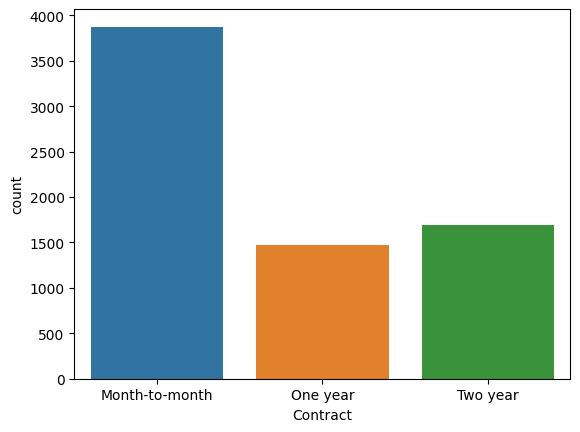

In [ ]:
#Distribution of Contract type
sns.countplot(x='Contract', data=df)
plt.show()

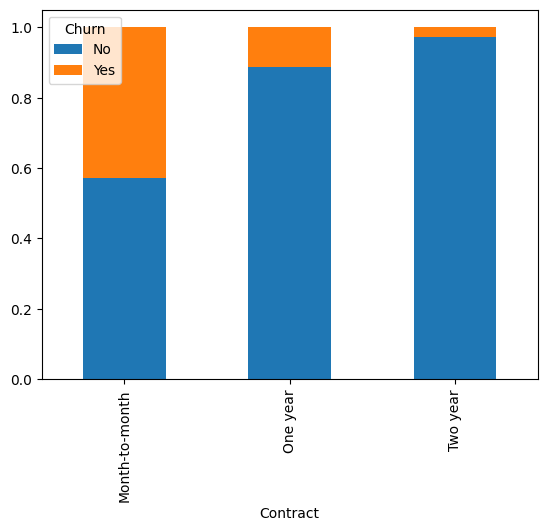

In [ ]:
#Churn rate by Contract type
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.show()

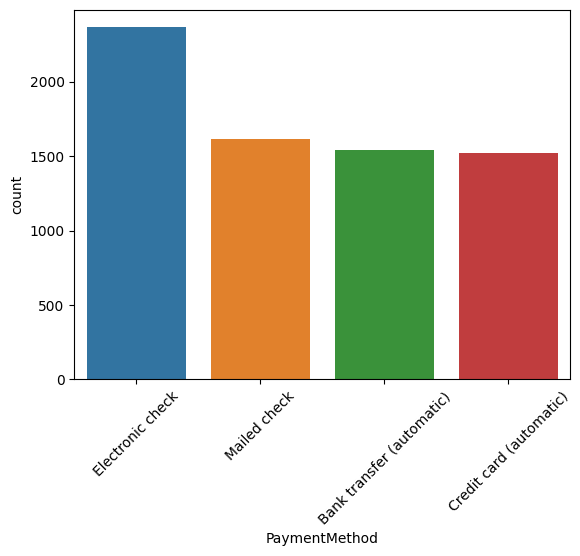

In [ ]:
#plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', data=df)
plt.xticks(rotation=45)
plt.show()

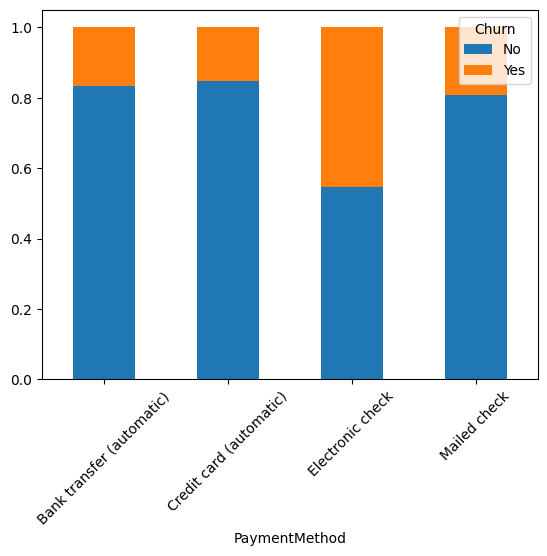

In [ ]:
#Churn rate by PaymentMethod
df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.show()

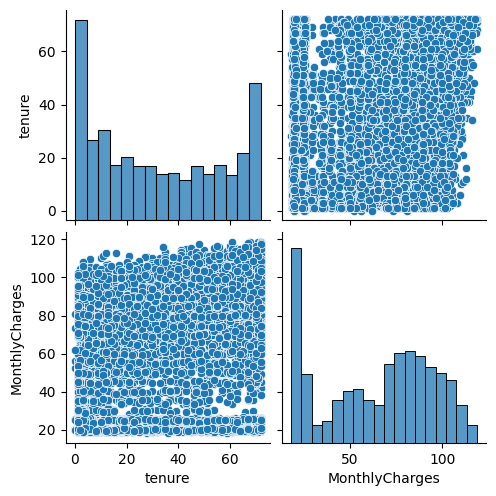

In [ ]:
#Pairplot of numerical features
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()


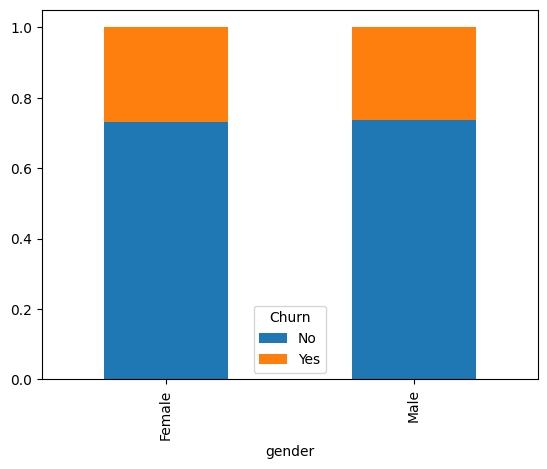

In [ ]:
#Churn rate by gender
df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.show()

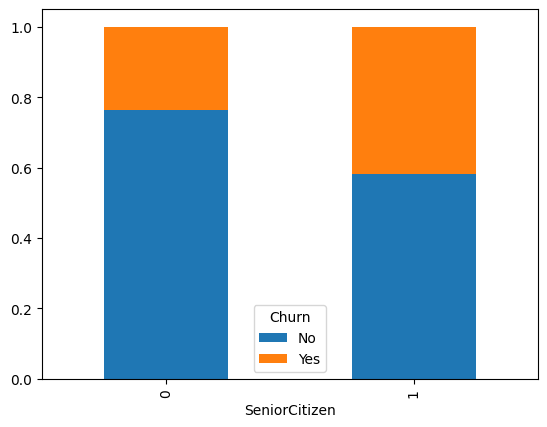

In [ ]:
#Churn rate by Senior Citizen
df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.show()

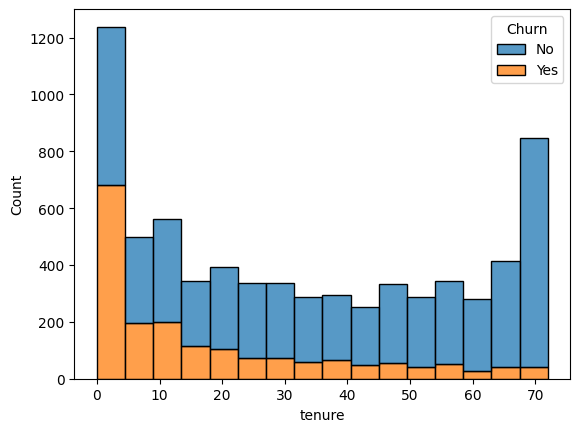

In [ ]:
#Distribution of tenure by Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.show()

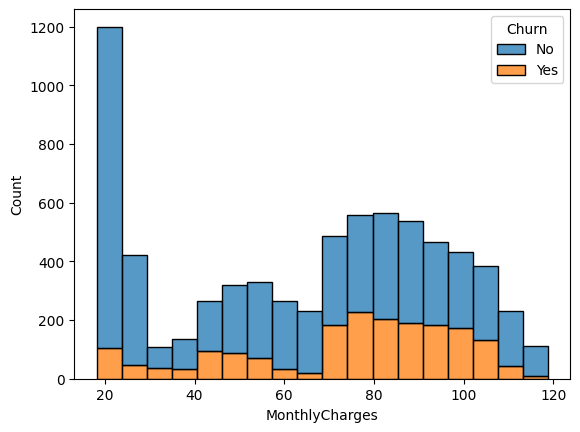

In [ ]:
##Distribution of Monthly Charges by Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Assuming your data is in a DataFrame 'df'
# Transform each categorical column with Label Encoder
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Define the independent variables and dependent variable
X = df.drop('Churn', axis=1)
y = df['Churn']


**LOGISTIC RERGRESSION**

Logistic regression is a statistical method that we use when the variable we're trying to predict, the outcome, is binary or dichotomous - it can take only two possible values.
Suppose we're looking at the chance of whether a student will pass or fail an exam based on how many hours they study. This is a binary outcome - pass or fail.

In a regular regression, we might predict the student's exact score based on how many hours they studied. But scores can range from 0 to 100 or more, and that's a lot of possibilities. Plus, we don't always need to know the exact score. We just need to know pass or fail.
So, instead of predicting the score, we predict the probability of passing - a number from 0 to 1. If the probability is closer to 1, the chance of passing is higher. If it's closer to 0, the chance of failing is higher.

Now, the 'logistic' part of logistic regression comes in because we use a special function, called the logistic function or the 'Sigmoid' function, which can take any input, no matter how big or small, and output a value between 0 and 1. This is perfect for predicting probabilities.

In the end, logistic regression tells us how a set of factors (like study hours, sleep hours, etc.) affects the probability of a binary outcome (like pass or fail).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1539
           1       0.64      0.55      0.59       574

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

[[1365  174]
 [ 259  315]]


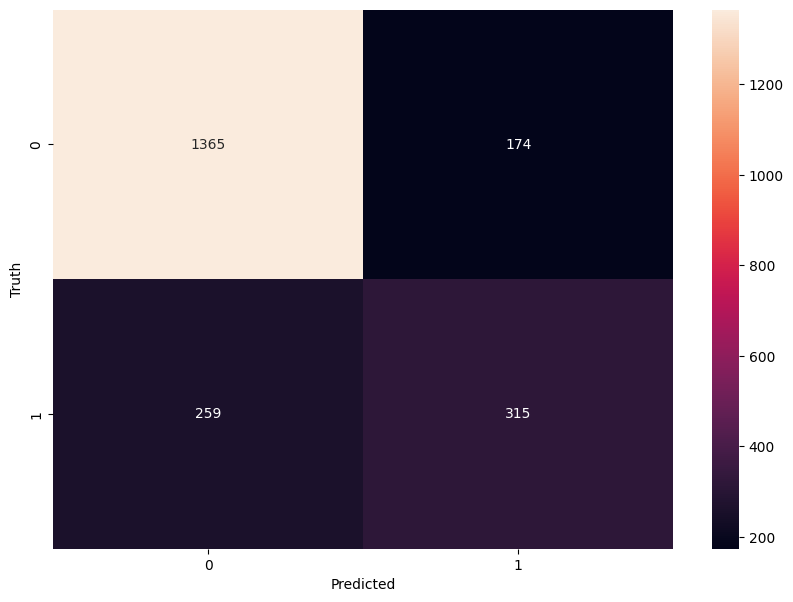

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating an instance of the Logistic Regression model
logistic_model = LogisticRegression()

# Training the model
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = logistic_model.predict(X_test)

# Printing the classification report
print(classification_report(y_test, predictions))

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Splitting the data into training and testing sets:** In order to evaluate how well our model performs, we need to test it on unseen data. Therefore, we divide our dataset into two parts: a training set and a testing set. The training set (70% of the data in this case) is used to train the model, and the testing set (30% of the data) is used to test the model's predictions.

**Creating an instance of the Logistic Regression model:** This line is like picking up a fresh, untrained logistic regression model from the toolbox, ready to be trained on our data.

**Training the model:** With this command, we're telling the logistic regression model to learn from the training data. Specifically, it learns the relationship between the features (X_train - things like study hours, sleep hours, etc.) and the target (y_train - pass or fail).

**Making predictions on the testing set: **Now that the model has been trained, it's time to see how well it does on the test data. It uses what it learned during training to make predictions on the test data.

**Printing the classification report:** The classification report provides important metrics about the performance of the model, such as precision, recall, f1-score, and accuracy. Precision is the number of true positive results divided by the number of all positive results. Recall is the number of true positive results divided by the number of positive results that should have been returned. The f1-score is the harmonic mean of precision and recall, and accuracy is the ratio of correct predictions to total predictions.

**Creating the confusion matrix: **A confusion matrix is a table that is used to describe the performance of a classification model. It contains information about the actual and predicted classifications done by the model.

**Plotting the confusion matrix:** This part of the code creates a visual representation of the confusion matrix using a heatmap. The 'truth' or actual values are on the y-axis and the predicted values are on the x-axis. Each cell in the grid corresponds to a count of how many instances of class i were predicted as class j. For example, the top left cell shows how many negatives were correctly predicted, and the bottom right cell shows how many positives were correctly predicted.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Confusion Matrix:
[[923 113]
 [165 208]]


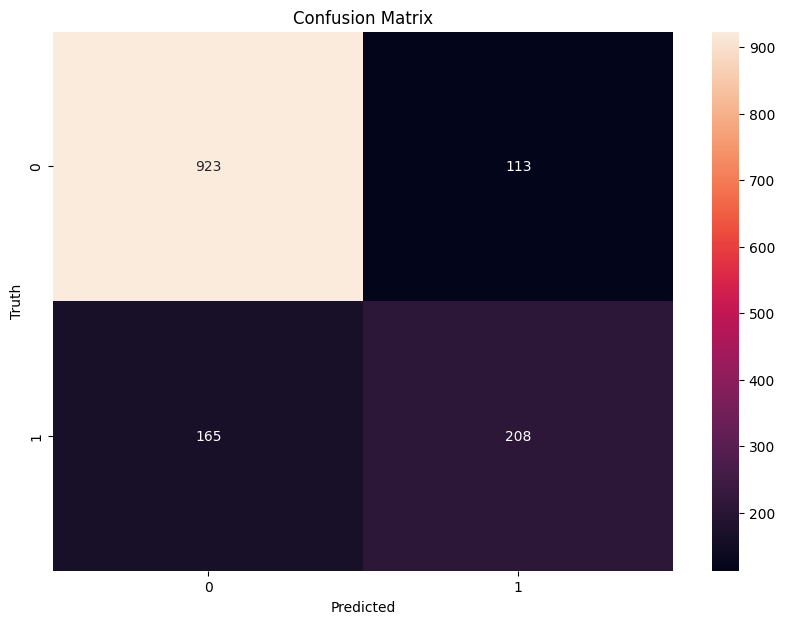

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Logistic Regression model
logistic_model = LogisticRegression()

# Training the model
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
predictions = logistic_model.predict(X_test)

# Printing the classification report
print(classification_report(y_test, predictions))

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Confusion Matrix:
[[1404  135]
 [ 285  289]]


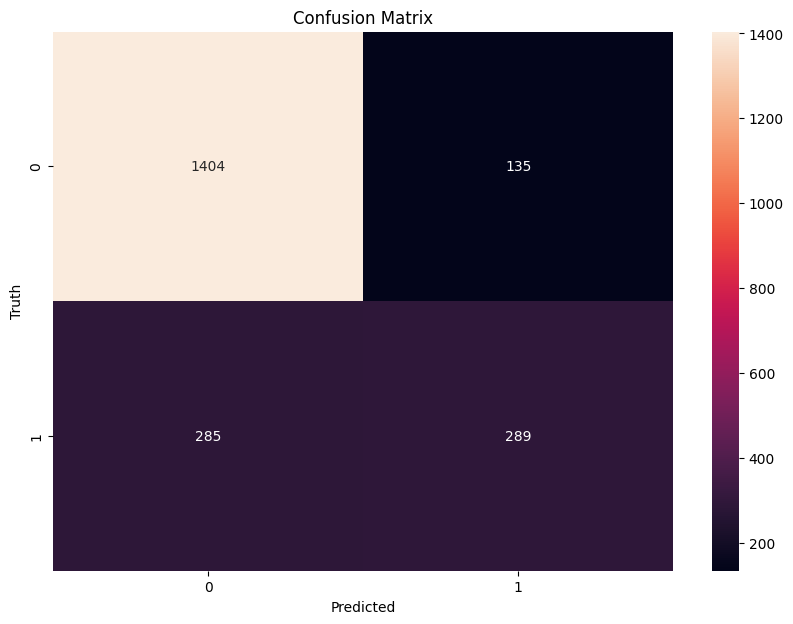

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier()

# Train the model using the training sets
gradient_boosting_classifier.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = gradient_boosting_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


**X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42):** This line is splitting your data into two sets: a training set and a testing set. The training set (70% of your data) is what we will use to teach our model about the relationship between the features (X) and the outcome we are trying to predict (y). The testing set (30% of your data) will be used to check how well our model has learned to make predictions.

**gradient_boosting_classifier = GradientBoostingClassifier():** Here, we're creating a new Gradient Boosting Classifier. This is a specific type of machine learning model that's good for making predictions when you have a lot of different variables that might influence the outcome.

**gradient_boosting_classifier.fit(X_train, y_train):** This line is where the model actually learns from the data. It's looking at the features (X_train) and the corresponding outcomes (y_train), and figuring out the relationship between them.

**y_pred = gradient_boosting_classifier.predict(X_test):** Now that the model is trained, it's time to see how well it can make predictions. We give it the features from our testing set (X_test), and it gives us a set of predictions (y_pred), which we can compare to the real outcomes.

**print(classification_report(y_test, y_pred)): **This line prints out a report summarizing how well our model did. It includes metrics like precision (how many of the items it identified were correctly identified), recall (how many of the actual items it was able to find), and f1-score (a combination of precision and recall).

**conf_mat = confusion_matrix(y_test, y_pred): **This line creates a confusion matrix, which is a table that describes how well our model did at predicting the outcomes. It shows us how many times the model predicted each outcome correctly, and how many times it was wrong.

The rest of the code is used to print and visualize the confusion matrix using a heatmap. The heatmap helps us to visually understand the performance of the model.

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[944  92]
 [178 195]]


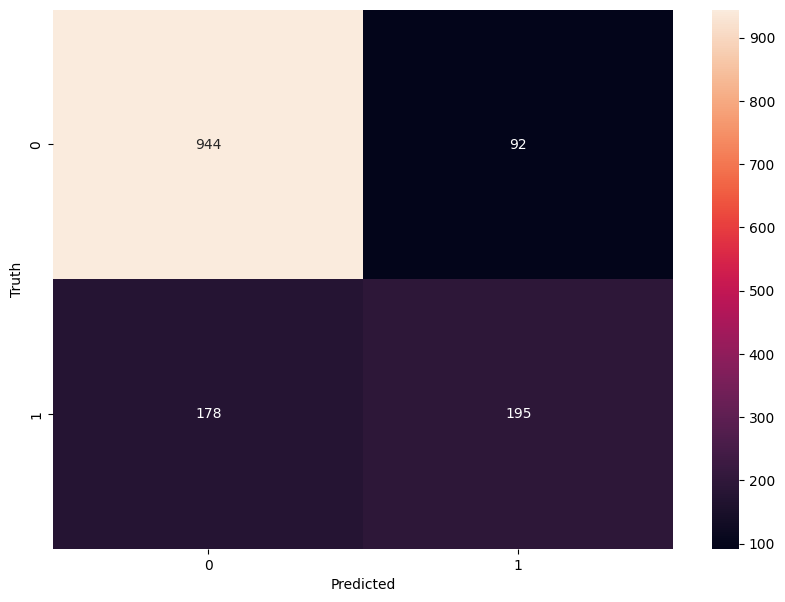

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier()

# Train the model using the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predictions = gradient_boosting_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Score:  0.798899538516152
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      1036
           1       0.69      0.46      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix: 
 [[959  77]
 [200 173]]


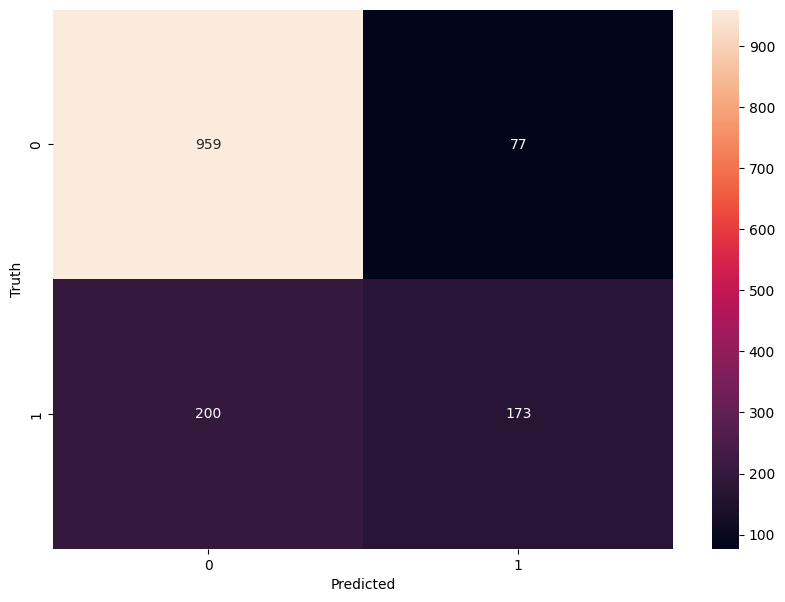

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Initialize GridSearchCV with the classifier and parameter grid
grid = GridSearchCV(gb, param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV on the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best accuracy score
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

# Make predictions with the best model
y_pred = grid.predict(X_test)

# Print the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))

# Compute the confusion matrix and print it
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_mat)

# Plot the confusion matrix with absolute values
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


**Importing libraries:** The code first brings in a specific set of tools or "libraries" that are necessary to perform the tasks. These libraries have pre-written codes that make our tasks easier. The sklearn.model_selection library, for instance, includes a tool called GridSearchCV which we'll use later to optimize our model.

**Setting parameters: ** Next, the code defines a range of possible parameters for a machine learning model. These are essentially settings that the model can use, each one giving different results. This code does it for three parameters: n_estimators, learning_rate, and max_depth.

**Initialize the Gradient Boosting Classifier:** This line is creating a type of machine learning model called a Gradient Boosting Classifier. Think of it as hiring a detective who's going to solve a crime (predict an outcome) by gathering clues (learning from data).

**Initialize GridSearchCV:** GridSearchCV is a handy tool that basically says, "I'm going to test out all combinations of these parameters for you and find out which one gives the best results". It uses the Gradient Boosting model, tries out all combinations of parameters that we provided in the parameter grid, and it does this through a process called cross-validation (that's the 'CV' part), which helps ensure the model's accuracy isn't just a fluke of the specific data it was trained on.

**Fit GridSearchCV on the training data:** Now, the model is actually being trained. It's going through the training data and learning the patterns, using all those different parameter settings.

**Print the best parameters and the best accuracy score:** After the model has been trained, the code prints out the parameters that worked the best, along with the best score that was achieved with those parameters.

**Make predictions with the best model:** The model, now trained, makes predictions on the test data.

Print the classification report: This shows a report of how well the model did, including metrics like precision and recall that tell us about its performance.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1412  127]
 [ 297  277]]


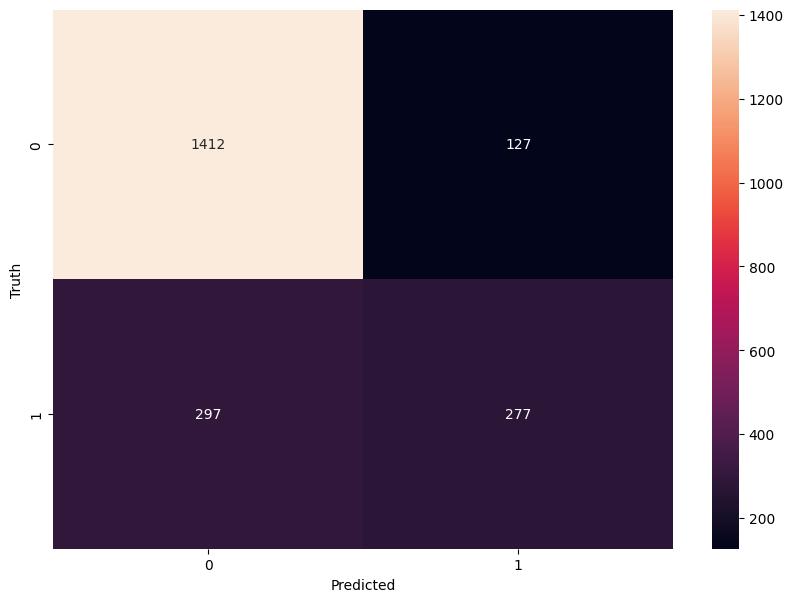

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

# Train the model using the training data
random_forest_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_predicted = random_forest_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_predicted))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)

# Print the confusion matrix
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

[[944  92]
 [189 184]]


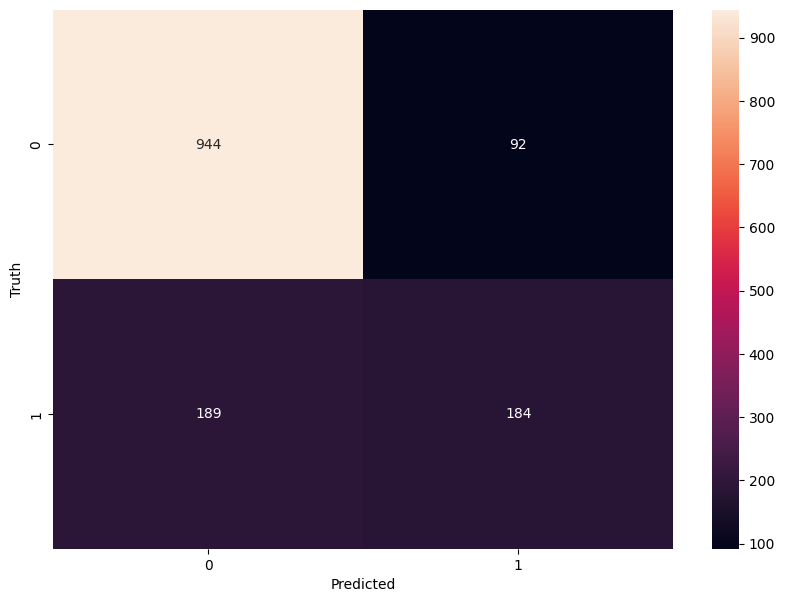

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest Classifier
random_forest_classifier = RandomForestClassifier()

# Train the model using the training data
random_forest_classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_predicted = random_forest_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_predicted))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)

# Print the confusion matrix
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  0.8044018459353923
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.81      1409

Confusion Matrix: 
 [[950  86]
 [176 197]]


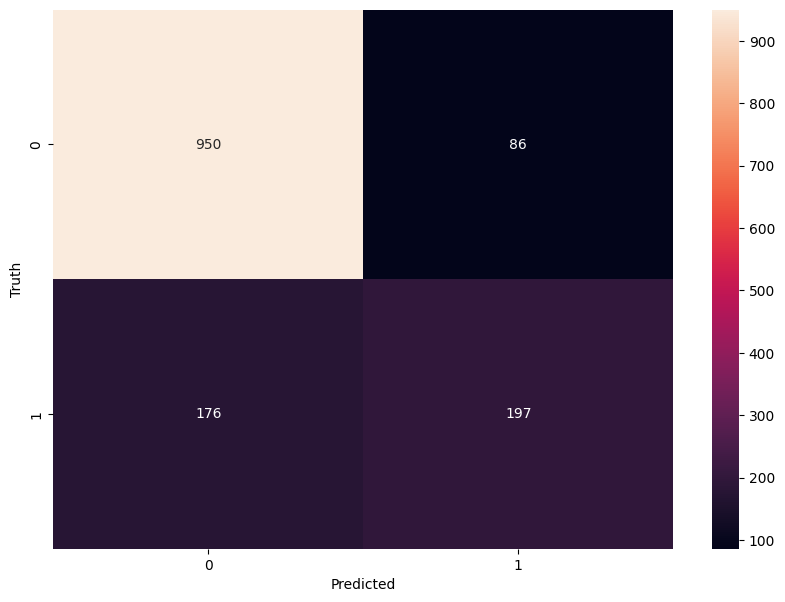

In [ ]:
# Define the parameter grid
parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest, parameter_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Make predictions with the best model
predicted_values = grid_search.predict(X_test)

# Print the classification report
print("Classification Report: \n", classification_report(y_test, predicted_values))

# Print and plot the confusion matrix
confusion_mat = confusion_matrix(y_test, predicted_values)
print("Confusion Matrix: \n", confusion_mat)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


**Parameter grid definition:** We start by defining a 'grid' of parameters. These are the settings the Random Forest algorithm will test, trying different combinations of 'n_estimators' (the number of trees in the forest), 'max_depth' (how deep each tree can go), 'min_samples_split' (the minimum number of samples required to split an internal node), and 'min_samples_leaf' (the minimum number of samples required to be at a leaf node).

**Initialize the Random Forest Classifier: **A new Random Forest Classifier is created, but with no specific settings defined yet.

**Initialize GridSearchCV:** GridSearchCV is a tool that allows us to test all the combinations of parameters in our grid. The goal is to find the combination that works best for our specific problem. It does this by dividing the data into a certain number of 'folds' (in this case, 3), and checking how well the model performs for each combination of parameters on these folds. It then chooses the settings where the model had the best average performance. This process is known as cross-validation.

**Fit GridSearchCV:** GridSearchCV is then used to fit the model on the training data. In other words, it's learning from this data, trying to find patterns that can help it make predictions.

**Print the best parameters and the best score:** Once it has tested all combinations, GridSearchCV can tell us which settings worked best (the 'best parameters') and what the best average accuracy score was on the training data.

**Predict with the best model:** We then use the best-performing model (with the best settings) to make predictions on our test data. This is data the model hasn't seen before.

Print the classification report and confusion matrix: **bold text** Finally, we evaluate how well our model did. The 'classification report' gives us precision, recall, f1-score, and support for each class. The 'confusion matrix' tells us where the model made correct predictions and where it made mistakes.

In [ ]:
# Fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get feature importance
feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_[0]})
print(feature_importance_lr.sort_values(by='Importance', ascending=False))


             Feature  Importance
7      MultipleLines    0.186044
16  PaperlessBilling    0.159730
2      SeniorCitizen    0.135935
14   StreamingMovies    0.106892
13       StreamingTV    0.067130
18    MonthlyCharges    0.015622
17     PaymentMethod    0.006218
19      TotalCharges    0.000018
0         customerID   -0.000052
5             tenure   -0.034550
8    InternetService   -0.040216
3            Partner   -0.048915
1             gender   -0.097594
11  DeviceProtection   -0.102738
4         Dependents   -0.167938
10      OnlineBackup   -0.169344
6       PhoneService   -0.241289
12       TechSupport   -0.395753
9     OnlineSecurity   -0.421297
15          Contract   -0.423239


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Fit the model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Get feature importance
feature_importance_gb = pd.DataFrame({'Feature': X.columns, 'Importance': gb.feature_importances_})
print(feature_importance_gb.sort_values(by='Importance', ascending=False))


             Feature  Importance
15          Contract    0.410833
5             tenure    0.176605
18    MonthlyCharges    0.117949
9     OnlineSecurity    0.082019
12       TechSupport    0.051529
19      TotalCharges    0.042892
0         customerID    0.026173
17     PaymentMethod    0.019817
16  PaperlessBilling    0.016489
8    InternetService    0.014068
7      MultipleLines    0.010496
10      OnlineBackup    0.008858
2      SeniorCitizen    0.008595
14   StreamingMovies    0.006687
11  DeviceProtection    0.001790
13       StreamingTV    0.001579
6       PhoneService    0.001269
3            Partner    0.001138
4         Dependents    0.000953
1             gender    0.000261


In [ ]:
# Fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(feature_importance_rf.sort_values(by='Importance', ascending=False))


             Feature  Importance
5             tenure    0.160145
18    MonthlyCharges    0.144145
19      TotalCharges    0.134924
0         customerID    0.129362
15          Contract    0.069770
9     OnlineSecurity    0.048496
12       TechSupport    0.045219
17     PaymentMethod    0.044660
10      OnlineBackup    0.025980
8    InternetService    0.024643
1             gender    0.023095
16  PaperlessBilling    0.021815
7      MultipleLines    0.020106
3            Partner    0.019496
11  DeviceProtection    0.018276
2      SeniorCitizen    0.017528
4         Dependents    0.016371
14   StreamingMovies    0.015602
13       StreamingTV    0.014710
6       PhoneService    0.005658
